Example taken from https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

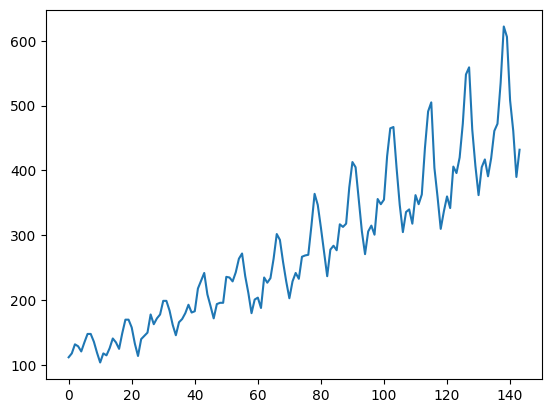

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))# normalize to range from 0 to 1
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1# How many previous time steps are considered to predict the next time step
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 1s - 9ms/step - loss: 0.0434
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0223
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0160
Epoch 4/100
94/94 - 0s - 1ms/step - loss: 0.0145
Epoch 5/100
94/94 - 0s - 1ms/step - loss: 0.0136
Epoch 6/100
94/94 - 0s - 967us/step - loss: 0.0127
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0119
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0110
Epoch 9/100
94/94 - 0s - 986us/step - loss: 0.0101
Epoch 10/100
94/94 - 0s - 1ms/step - loss: 0.0092
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0082
Epoch 12/100
94/94 - 0s - 1ms/step - loss: 0.0074
Epoch 13/100
94/94 - 0s - 957us/step - loss: 0.0065
Epoch 14/100
94/94 - 0s - 993us/step - loss: 0.0057
Epoch 15/100
94/94 - 0s - 957us/step - loss: 0.0050
Epoch 16/100
94/94 - 0s - 952us/step - loss: 0.0043
Epoch 17/100
94/94 - 0s - 915us/step - loss: 0.0038
Epoch 18/100
94/94 - 0s - 989us/step - loss: 0.0033
Epoch 19/100
94/94 - 0s - 957us/step - loss: 0.0029
Epoch 20/100
94/94 - 0s - 979us/step - lo

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 22.88 RMSE
Test Score: 48.71 RMSE


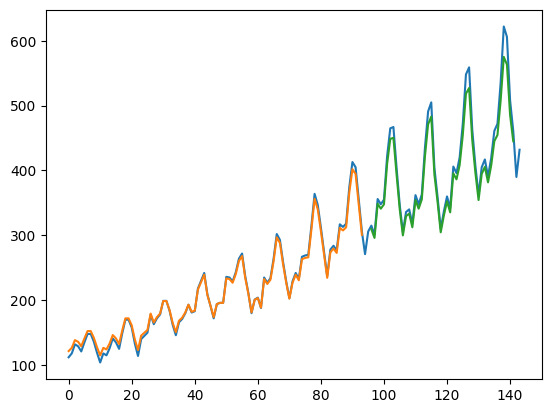

In [37]:
# don't shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[0:len(trainPredict), :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+2:len(dataset)-2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100


C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 9ms/step - loss: 0.0449
Epoch 2/100
92/92 - 0s - 1ms/step - loss: 0.0178
Epoch 3/100
92/92 - 0s - 924us/step - loss: 0.0119
Epoch 4/100
92/92 - 0s - 1ms/step - loss: 0.0100
Epoch 5/100
92/92 - 0s - 979us/step - loss: 0.0085
Epoch 6/100
92/92 - 0s - 984us/step - loss: 0.0072
Epoch 7/100
92/92 - 0s - 966us/step - loss: 0.0061
Epoch 8/100
92/92 - 0s - 1ms/step - loss: 0.0052
Epoch 9/100
92/92 - 0s - 1ms/step - loss: 0.0045
Epoch 10/100
92/92 - 0s - 1ms/step - loss: 0.0040
Epoch 11/100
92/92 - 0s - 1ms/step - loss: 0.0037
Epoch 12/100
92/92 - 0s - 1ms/step - loss: 0.0034
Epoch 13/100
92/92 - 0s - 1ms/step - loss: 0.0033
Epoch 14/100
92/92 - 0s - 1ms/step - loss: 0.0032
Epoch 15/100
92/92 - 0s - 1ms/step - loss: 0.0031
Epoch 16/100
92/92 - 0s - 1ms/step - loss: 0.0031
Epoch 17/100
92/92 - 0s - 1ms/step - loss: 0.0031
Epoch 18/100
92/92 - 0s - 1ms/step - loss: 0.0030
Epoch 19/100
92/92 - 0s - 989us/step - loss: 0.0030
Epoch 20/100
92/92 - 0s - 1ms/step - loss: 0.0030
Epoch 21/10

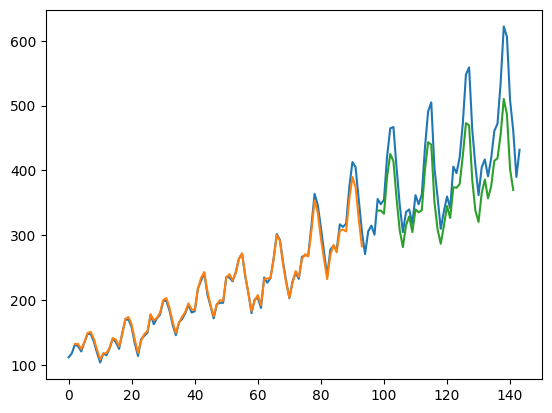

In [49]:
# LSTM for international airline passengers problem with window regression framing, i.e. look back 2 time steps
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[2:len(trainPredict)+2, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+6:len(dataset)-2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()